In [1]:
import matplotlib.pyplot as plt
import numpy as np


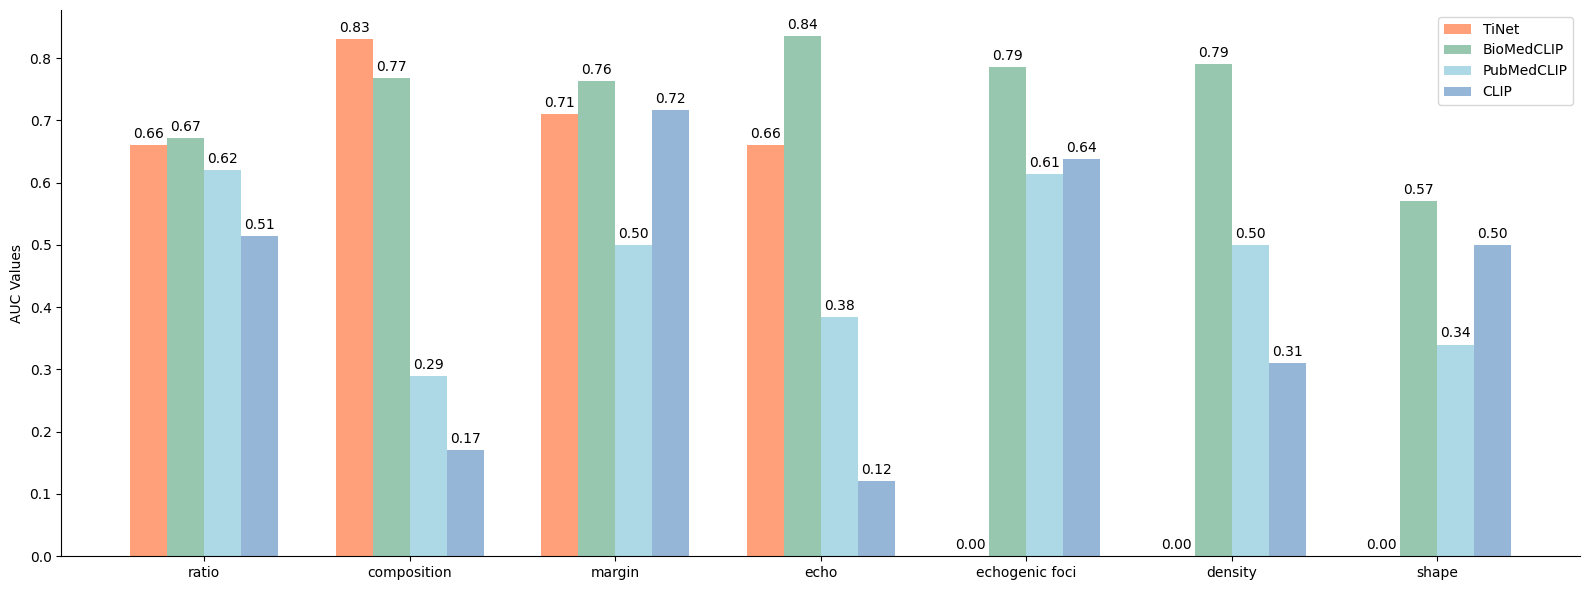

In [2]:


# 提供的数据
data = {
    'Model': ['TiNet', 'BioMedCLIP','PubMedCLIP', 'CLIP'],
    'ratio': [0.66, 0.671892, 0.620465, 0.5134746],
    'composition': [0.83, 0.768157488886872, 0.2899608610567515 , 0.170939334637964],
    'margin': [0.71, 0.763052767679578, 0.5 , 0.716396189548509],
    'echo': [0.66, 0.835348, 0.384117520678912 , 0.120837361692985],
    'echogenic foci':[0,0.78512,0.613114 ,0.637243497971844],
    'density':[0,0.79,0.5,0.31],
    "shape":[0,0.57,0.34,0.5]
}

# 转换数据格式，方便操作
models = np.array(data['Model'])
indices = ['ratio', 'composition', "margin", 'echo', 'echogenic foci','density',"shape"]
values = np.array([data[index] for index in indices])

num_indices = len(indices)
num_models = len(models)
x = np.arange(num_indices)  # 指标数量
width = 0.18  # 柱子的宽度
group_width = 0.8  # 组宽度，用于增加组间距

# 颜色配方案
colors = ['#FFA07A', '#97C8AF', '#ADD8E6', '#96B6D8']

# 创建图形和轴
fig, ax = plt.subplots(figsize=(16, 6))
# 去除上方和右方的边框线
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# 生成柱状图
for i, model in enumerate(models):
    rects = ax.bar(x + i * width + (i // num_models) * group_width, values[:, i], width, label=model, color=colors[i])
    # 在每个柱子上添加数值标签
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3点垂直偏移
                    textcoords="offset points",
                    ha='center', va='bottom')

# 添加文本、标题和自定义X轴标签
# ax.set_xlabel('Metrics')
ax.set_ylabel('AUC Values')
# ax.set_title('AUC Performance')
ax.set_xticks(x + 1.5*width)
ax.set_xticklabels(indices)
ax.legend()

# 优化显示布局
fig.tight_layout()
plt.savefig('model_performance.pdf', format='pdf', transparent=True)
# 显示图形
plt.show()




## Dataset Show

['/export/home/wuyueting/thyroid_data/BM/5_nodule811/test/1/b12161020140418.jpg', '/export/home/wuyueting/thyroid_data/BM/5_nodule811/test/1/b13160126074754.jpg', '/export/home/wuyueting/thyroid_data/BM/5_nodule811/test/1/636662160406181637.jpg', '/export/home/wuyueting/thyroid_data/BM/5_nodule811/test/1/636623145337328534.jpg']


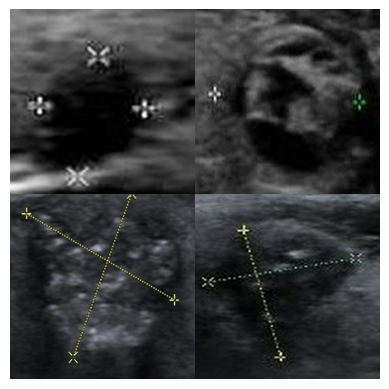

In [3]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import random
random.seed(44)

def data_show(label):
    # 设置图片文件夹路径
    image_folder = f'/export/home/wuyueting/thyroid_data/BM/5_nodule811/test/{label}/'

    # 获取所有图片文件
    # image_files = [f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

    # 检查文件夹中的图片数量
    # if len(image_files) < 4:
    #     raise ValueError(f"文件夹中只有 {len(image_files)} 张图片，无法继续。")

    # 提供图片选择功能
    # print("以下是可选的图片文件：")
    # for i, file_name in enumerate(image_files):
    #     print(f"{i+1}: {file_name}")

    # # 用户输入选择
    # selected_indices = input("请选择4张图片的编号 (用空格分隔，例如 1 3 5 7): ")
    # selected_indices = [int(idx) - 1 for idx in selected_indices.split()]

    # # 检查是否选择了四张图片
    # if len(selected_indices) != 4:
    #     raise ValueError("你必须选择 4 张图片。")
    
    # 根据用户选择打开图片
    # selected_images = [image_files[idx] for idx in selected_indices]
    # selected_images = random.sample(image_files,4)
    if label == '0':
        selected_images = ["/export/home/wuyueting/thyroid_data/BM/5_nodule811/test/0/1156.jpg",
                       "/export/home/wuyueting/thyroid_data/BM/5_nodule811/test/0/32.jpg",
                       "/export/home/wuyueting/thyroid_data/BM/5_nodule811/test/0/634234220405937500.jpg",
                       "/export/home/wuyueting/thyroid_data/BM/5_nodule811/test/0/636190279804687500.jpg"
                       ]
    elif label == "1":
        selected_images=[
            "/export/home/wuyueting/thyroid_data/BM/5_nodule811/test/1/b12161020140418.jpg",
            "/export/home/wuyueting/thyroid_data/BM/5_nodule811/test/1/b13160126074754.jpg",
            "/export/home/wuyueting/thyroid_data/BM/5_nodule811/test/1/636662160406181637.jpg",
            "/export/home/wuyueting/thyroid_data/BM/5_nodule811/test/1/636623145337328534.jpg"
        ]
            
    print(selected_images)
    images = [Image.open(os.path.join(image_folder, img)) for img in selected_images]

    size = 224
    # 设定固定尺寸，每张图片 112x112
    target_size = (size, size)

    # 缩放图片到目标尺寸
    resized_images = [img.resize((target_size),Image.ANTIALIAS) for img in images]

    # 创建固定尺寸的拼接画布 224x224
    canvas_size = (size*2, size*2)
    new_image = Image.new('RGB', canvas_size)

    # 逐一粘贴缩放后的图片到 2x2 网格
    new_image.paste(resized_images[0], (0, 0))  # 左上角
    new_image.paste(resized_images[1], (size, 0))  # 右上角
    new_image.paste(resized_images[2], (0, size))  # 左下角
    new_image.paste(resized_images[3], (size, size))  # 右下角

    # 使用 matplotlib 显示拼接好的图片
    plt.imshow(new_image)
    plt.axis('off')  # 不显示坐标轴
    

    plt.savefig(f'thyroid_{label}.png', dpi=330,transparent=True,bbox_inches='tight')
    plt.show()

data_show('1')

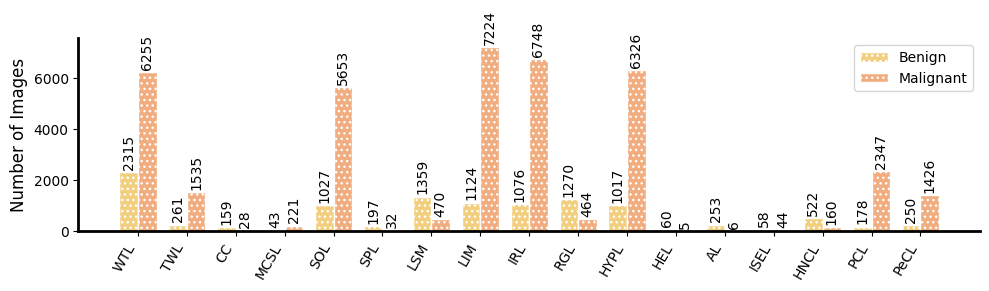

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
def data_show1():

    # 创建数据字典
    data_dict = {
            "WTL":[2315,6255],
            "TWL":[261,1535],
            "CC":[159,28],
            "MCSL":[43,221],
            "SOL":[1027,5653],
            "SPL":[197,32],
            "LSM":[1359,470],
            "LIM":[1124,7224],
            "IRL":[1076,6748],
            "RGL":[1270,464],
            "HYPL":[1017,6326],
            "HEL":[60,5],
            "AL":[253,6],
            "ISEL":[58,44],
            # "uneven echoic":[1169,7105],
            "HNCL":[522,160],
            'PCL':[178,2347],
            'PeCL':[250,1426]
            # "calcified":[1613,9600],
            
    }


    
    # 将字典转换为 DataFrame
    df = pd.DataFrame(data_dict).T  # 转置 DataFrame，便于处理
    df.columns = ['Label 0', 'Label 1']  # 设置列名

    # 创建柱状图
    plt.figure(figsize=(10, 3))
    x = np.arange(len(df.index))  # 分类的索引位置
    width = 0.38  # 柱子的宽度

        # 去掉上边框和右边框
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_linewidth(2)
    plt.gca().spines['left'].set_linewidth(2)

    # 绘制两组柱子
    bars1 = plt.bar(x - width/2, df['Label 0'], width, label='Benign', edgecolor="white", color='#F2CF7E', linewidth=1,hatch='...')
    bars2 = plt.bar(x + width/2, df['Label 1'], width, label='Malignant',edgecolor="white", color='#F1AD7F',lw=1,hatch='...')

    # 添加数据标签
    for bar in bars1:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height()+100,  # 增加偏移量
                f'{bar.get_height()}', ha='center', va="bottom", color='black', rotation=90,fontsize=10)

    for bar in bars2:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height()+100,  # 增加偏移量
                f'{bar.get_height()}', ha='center', va="bottom", color='black', rotation=90,fontsize=10)

    # 设置标题和标签
    # plt.title('Distribution of Types', fontsize=16)
    # plt.xlabel('Type', fontsize=14)
    plt.ylabel('Number of Images', fontsize=12)

    # 设置x轴刻度和网格
    plt.xticks(x, df.index, rotation=60, ha='right')  # 设置x轴刻度
    # plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()  # 添加图例
    plt.tight_layout()
    plt.savefig('type_distribution.png', dpi=300,transparent=True)  # 保存图像
    plt.show()  # 显示图像
    
data_show1()

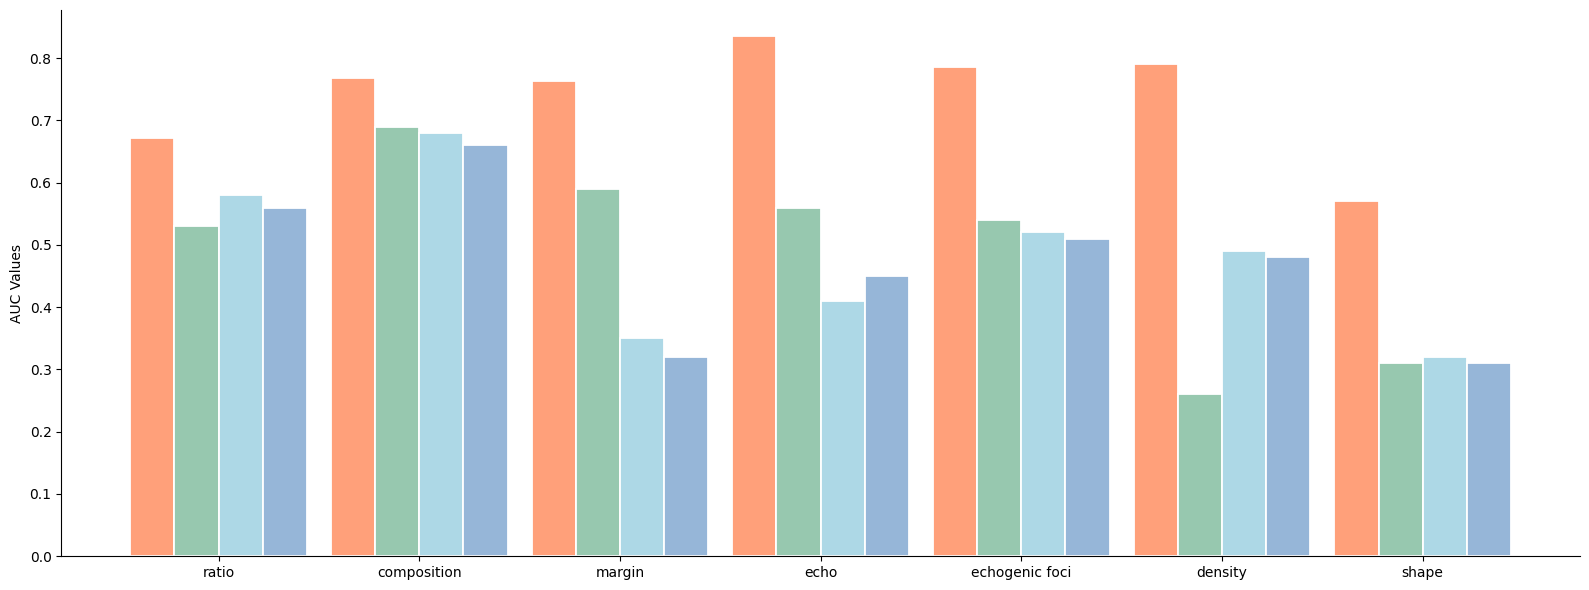

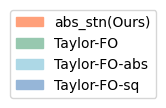

In [6]:
import matplotlib.patches as mpatches
# 提供的数据
data = {
    'importance_matric': ['abs_stn(Ours)', 'Taylor-FO','Taylor-FO-abs', 'Taylor-FO-sq'],
    'ratio': [0.671892, 0.53, 0.58,0.56],
    'composition': [0.768157488886872, 0.69,0.68,0.66],
    'margin': [0.763052767679578, 0.59,0.35,0.32],
    'echo': [0.835348, 0.56,0.41,0.45],
    'echogenic foci':[0.78512,0.54 ,0.52,0.51],
    'density':[0.79,0.26,0.49,0.48],
    "shape":[0.57,0.31,0.32,0.31]
}

# 转换数据格式，方便操作
models = np.array(data['importance_matric'])
indices = ['ratio', 'composition', "margin", 'echo', 'echogenic foci','density',"shape"]
values = np.array([data[index] for index in indices])

num_indices = len(indices)
num_models = len(models)
x = np.arange(num_indices)  # 指标数量
width = 0.22  # 柱子的宽度
group_width = 0.8  # 组宽度，用于增加组间距

# 颜色配方案
# colors = ['#97C8AF', '#FFBE72', '#F8AC8C', '#BEB8DC']
colors = ['#FFA07A', '#97C8AF', '#ADD8E6', '#96B6D8']
# 创建图形和轴
fig, ax = plt.subplots(figsize=(16, 6))
# 去除上方和右方的边框线
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# 生成柱状图
for i, model in enumerate(models):
    rects = ax.bar(x + i * width + (i // num_models) * group_width, values[:, i], width, label=model, color=colors[i],edgecolor='white', linewidth=1.3)
    # 在每个柱子上添加数值标签
    for rect in rects:
        height = rect.get_height()
        # ax.annotate(f'{height:.2f}',
        #             xy=(rect.get_x() + rect.get_width() / 2, height),
        #             xytext=(0, 3),  # 3点垂直偏移
        #             textcoords="offset points",
        #             ha='center', va='bottom')

# 添加文本、标题和自定义X轴标签
# ax.set_xlabel('Metrics')
ax.set_ylabel('AUC Values')
# ax.set_title('AUC Performance')
ax.set_xticks(x + 1.5*width)
ax.set_xticklabels(indices)
# ax.legend()

# 优化显示布局
fig.tight_layout()
plt.savefig('matric_performance.pdf', format='pdf', transparent=True)
# 显示图形
plt.show()

legend_handles = []

    # 对于我们的颜色映射字典，为每个颜色创建一个图例项
    # 假设我们已经有了color_map变量
for category, color in zip(data['importance_matric'],colors):
    # 使用matplotlib.patches中的Patch对象创建图例项
    handle = mpatches.Patch(color=color, label=category)
    legend_handles.append(handle)
        
# 创建一个空的图形
fig, ax = plt.subplots()

# 添加图例
legend = ax.legend(handles=legend_handles, loc='center')

# 删除所有轴，但保留图例
ax.axis('off')

# 设置图形大小适合图例
fig.canvas.draw()
bbox = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.set_size_inches(bbox.width, bbox.height)

# 保存图例为图片
plt.savefig('legend1.pdf', format='pdf',bbox_inches='tight')
# 显示图例
plt.show()


## pruning(The number of neurons pruned vs Accuracy plot)

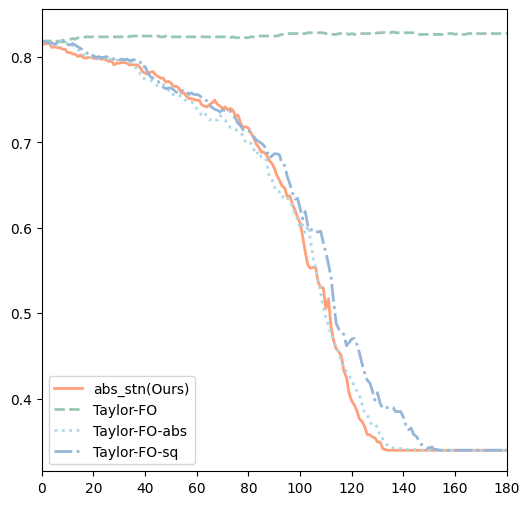

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_data(file_path, label, linestyle, color):
    data = pd.read_csv(file_path)
    plt.plot(data['Iteration'], data['ACC'], label=label, linestyle=linestyle, color=color, linewidth=2)  # 设置线条宽度为3
    
files = {
    "abs_stn(Ours)": "aucacc_records.csv",
    "Taylor-FO": "ori_pruning.csv",
    "Taylor-FO-abs": "abs_old_pruning.csv",
    "Taylor-FO-sq": "sq_pruning.csv",
    # 'random':"random.csv",
}

# 创建图形
plt.figure(figsize=(6, 6))
# 设置颜色和线型
# colors = ['#299D8F', '#D69051', '#D66D5C', '#B395BD','#7DAEE0']
colors =  ['#FFA07A', '#97C8AF', '#ADD8E6', '#96B6D8']
linestyles = ['-', '--', ':', '-.','-']

# 绘制每个文件的数据
for (file_label, file_path), color, linestyle in zip(files.items(), colors, linestyles):
    plot_data(file_path, file_label, linestyle, color)

# 设置图表标题和图例
# plt.title('Neurons Pruned vs Accuracy')
# plt.xlabel('Neurons Pruned (total:384)')
# plt.ylabel('Test Accuracy')
plt.legend()
plt.xlim(0, 180)
plt.savefig('neuron_pruned.pdf', format='pdf', transparent=True)
# 保存图像

# 显示图表
plt.show()

In [8]:
categories_bak = {
'composition': [
    "mixed cystic-solid nodule",
    "mixed cystic/solid nodule",
    "spongiform nodule",
    "circular cyst",
    "solid nodule",
],
'echo': [
    "anechoic echo nodule",
    "isoechoic echo nodule",
    "hypoechoic echo nodule",
    "hyperechoic echo nodule"
],
'shape': [
    "oval shape nodule",
    "round shape nodule",
    "irregular shape nodule",
    "Regular shape nodule",
    "regular shape nodule",
    
],
'margin': [
    "marginal irregular nodule",
    "marginal smooth nodule",
    "marginal ill-defined nodule",
    "marginal lobulated nodule"
],
'echogenic foci': [
    "punctate calcified nodule",
    "peripheral calcified nodule",
    "massive area calcified nodule"
],
'ratio': [
    "wider-than-tall nodule",
    "taller-than-wide nodule",
    "vertically elongated nodule",  # 新增
    "horizontally elongated nodule",  # 新增
    "transverse nodule",
    "longitudinal nodule"
],
'density': [
    "low-density nodule",
    "equal-density nodule",
    "high-density nodule"
]
}
color_map = {
    
    # 'Echo': '#96B6D8',
    # 'Shape': '#97C8AF',
    # 'Ratio':'#ADD8E6',
    # 'Margin':'#BEB8DC',
    # 'Calcification': '#F09148',
    # 'Composition': '#FFA07A',
    # 'Density':  '#FFBE72' ,
    
    'echo': '#F8AC8C',
    'shape': '#F1D77E',
    'ratio':'#B1CE46',
    'margin':'#63E398',
    'echogenic foci': '#9DC3E7',
    'composition': '#9394E7',
    'density':  '#5F97D2' ,
}

In [9]:
categories_birads = {
"Shape" : [
    "rounded lesion",
    "oval lesion",
    "irregular lesion"
],

# Margin-related lesions
"Margin" : [
    "lesion with circumscribed margin",
    "lesion showing angular margins",
    "lesion with microlobulated margins",
    "lesion with spiculated margins",
    "lesion with indistinct margins"
],

# Halo-related lesion
"Halo" : [
    "lesion with surrounding echogenic halo"
],

# Orientation-related lesions
"Orientation" : [
    "wider than tall lesion",
    "taller than wide lesion",
    "horizontal oriented lesion",
    "vertical oriented lesion"
],

# Echo-related lesions
"Echo" : [
    "wider than tall hypoechoic lesion",
    "taller than wide hypoechoic lesion",
    "hypoechoic nonparallel lesion",
    "hypoechoic parallel lesion",
    "hyperechoic lesion",
    "isoechoic lesion",
    "hypoechoic lesion"
],

# Calcification-related lesions
"Calcification" : [
    "punctate calcified lesion",
    "peripheral calcified lesion",
    "massive area calcified lesion",
    "homogeneously non-calcified lesion",
],

# Homogeneity-related lesions
"Homogeneous" : [
    "homogeneous lesion",
    "heterogeneous lesion"
],

# Posterior feature-related lesions
"Posterior" : [
    "lesion with posterior shadowing",
    "lesion with posterior enhancement",
    "lesion with no posterior change"
],

# Size-related lesions
"Size" : [
    "small lesion",
    "medium lesion",
    "large lesion"
],
}
color_map = {
    
    # 'Echo': '#96B6D8',
    # 'Shape': '#97C8AF',
    # 'Ratio':'#ADD8E6',
    # 'Margin':'#BEB8DC',
    # 'Calcification': '#F09148',
    # 'Composition': '#FFA07A',
    # 'Density':  '#FFBE72' ,
    
    'echo': '#F8AC8C',
    'shape': '#F1D77E',
    'ratio':'#B1CE46',
    'margin':'#63E398',
    'echogenic foci': '#9DC3E7',
    'composition': '#9394E7',
    'density':  '#5F97D2' ,
}

In [10]:
def get_categories_and_colormap():
    categories = {
        
        'TIRADS': [
            "mixed cystic and solid lesion",  # Original: "mixed cystic/solid lesion"
            "spongiform lesion",  # Original: "spongiform lesion"
            "circular cyst",  # Original: "circular cyst"
            "solid lesion",  # Original: "solid lesion"
            "anechoic lesion",  # Original: "anechoic echo lesion"
            "isoechoic lesion",  # Original: "isoechoic echo lesion"
            "hypoechoic lesion",  # Original: "hypoechoic echo lesion"
            "hyperechoic lesion",  # Original: "hyperechoic echo lesion"
            "lesion with irregular margins",  # Original: "marginal irregular lesion"
            "lesion with smooth margins",  # Original: "marginal smooth lesion"
            "lesion with ill-defined margins",  # Original: "marginal ill-defined lesion"
            "lesion with lobulated margins",  # Original: "marginal lobulated lesion"
            "punctate calcified lesion",  # Original: "punctate calcified lesion"
            "peripheral calcified lesion",  # Original: "peripheral calcified lesion"
            "massive area calcified lesion",  # Original: "massive area calcified lesion"
            "homogeneously non-calcified lesion",
            "longitudinal oriented lesion",
            "transverse oriented lesion",
            "vertical oriented lesion",
            "horizontal oriented lesion",
            "wider than tall lesion",
            "taller than wide lesion",
            "wider than tall hypoechoic lesion",
            "taller than wide hypoechoic lesion",
            
            
        ],
        'Shape': [
            "oval lesion",  # Original: "oval shape lesion"
            "round lesion",  # Original: "round shape lesion"
            "irregular lesion",  # Original: "irregular shape lesion"
            "regular lesion"  # Original: "regular shape lesion"
        ],
        'Size': [
            "small lesion",  # Original: "small lesion"
            "medium lesion",  # Original: "medium lesion"
            "large lesion",  # Original: "large lesion"
        ],
        'Density': [
            "low-density lesion",  # Original: "low-density lesion"
            "equal-density lesion",  # Original: "equal-density lesion"
            "high-density lesion"  # Original: "high-density lesion"
        ]
    }
    #'#FFA07A', '#97C8AF', '#ADD8E6'
    color_map = {
        'Size': '#ADD8E6',
        'TIRADS': '#BEB8DC',
        'Density':'#F2CF7E',
        'Shape':'#F1AD7F'
    }
    return categories, color_map

['Size', 'TIRADS', 'Density', 'Shape']


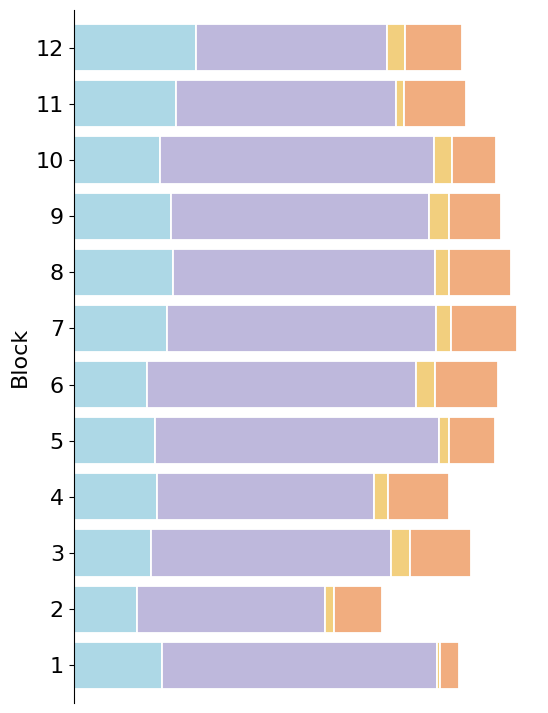

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
def barchat(clipmodel_name):
    if clipmodel_name == "biomedclip":
        filename = "/export/home/wuyueting/Interpretability/CLIP-dissect/results/thyroid_vit_24_10_09_15_08/descriptions.csv" ## 
    elif clipmodel_name == "vit":
        filename = "/export/home/wuyueting/Interpretability/CLIP-dissect/results/thyroid_vit_24_07_12_17_24/descriptions.csv" ##Vit-L/14
        filename = "/export/home/wuyueting/Interpretability/CLIP-dissect/results/thyroid_vit_24_08_02_11_17/descriptions.csv" ##vit-L/14
        filename = "/export/home/wuyueting/Interpretability/CLIP-dissect/results/thyroid_vit_24_08_02_14_43/descriptions.csv" ##resnet50

    df = pd.read_csv(filename)
    df.loc[df['similarity'] > 1, 'description'] = None
    categories,color_map = get_categories_and_colormap()
    description_to_category = {}
    for category, items in categories.items():
        for item in items:
            description_to_category[item] = category
    df['category'] = df['description'].map(description_to_category)
    # Count the number of units per layer per category
    category_counts = df.groupby(['layer', 'category']).size().unstack(fill_value=0)
    
    # 按数字排序索引，假设格式为 'blocks[n]'，其中 n 是数字
    category_counts.index = category_counts.index.astype(str)
    
    category_counts.sort_index(key=lambda x: x.str.extract('(\d+)', expand=False).astype(int), inplace=True)
    # category_counts = category_counts.iloc[::-1]
    # category_counts = category_counts.iloc[::]
    category_counts.index = (category_counts.index.str.extract('(\d+)', expand=False).astype(int) + 1).astype(str)
    
    sorted_columns = [key for key in color_map.keys() if key in category_counts.columns]
    print(sorted_columns)
    category_counts = category_counts[sorted_columns]
    # 绘制累积柱状图
    # colors = ['#F09148','#FFA07A','#FFBE72', '#96B6D8', '#BEB8DC' , '#ADD8E6' ,'#97C8AF']
    ax = category_counts.plot(kind='barh', stacked=True, figsize=(6, 9), color=color_map, width=0.84, edgecolor='white', linewidth=1.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    # 添加标题和标签

    # 显示图形
    ax.xaxis.set_visible(False)
    ax.legend().set_visible(False)
    # plt.xticks(rotation=45)
    # ax.set_title('Trend Analysis', fontsize=18)  # 调整标题字体大小
    # ax.set_xlabel('X-axis Label', fontsize=16)  # 调整X轴标签字体大小
    ax.set_ylabel('Block', fontsize=16)  # 调整Y轴标签字体大小
    ax.tick_params(axis='y', labelsize=16)  # 将Y轴刻度标签的字体大小设置为16
    plt.savefig("trend.png", bbox_inches='tight',dpi=330, transparent=True)
    plt.show()
    
barchat('biomedclip')

In [12]:
abbreviation_dict = {
    "longitudinal oriented lesion": "LOL",
    "transverse oriented lesion": "TOL",
    "vertical oriented lesion": "VOL",
    "horizontal oriented lesion": "HOL",
    "wider than tall hypoechoic lesion": "WTHEL",
    "taller than wide hypoechoic lesion": "TWHL",
    "wider than tall lesion": "WTL",
    "taller than wide lesion": "TWL",
    "oval lesion": "OL",
    "round lesion": "RL",
    "irregular lesion": "IRL",
    "regular lesion": "RGL",
    "mixed cystic and solid lesion": "MCSL",
    "spongiform lesion": "SPL",
    "solid lesion": "SOL",
    "circular cyst": "CC",
    "anechoic lesion": "AL",
    "isoechoic lesion": "ISEL",
    "hypoechoic lesion": "HYPL",
    "hyperechoic lesion": "HEL",
    "punctate calcified lesion": "PCL",
    "peripheral calcified lesion": "PeCL",
    "massive area calcified lesion": "MACL",
    "homogeneously non-calcified lesion": "HNCL",
    "lesion with lobulated margins": "LLM",
    "lesion with irregular margins": "LIM",
    "lesion with smooth margins": "LSM",
    "lesion with ill-defined margins": "LIDM",
    "low-density lesion": "LDL",
    "equal-density lesion": "EDL",
    "high-density lesion": "HDL",
    "small lesion": "SL",
    "medium lesion": "ML",
    "large lesion": "LL"
}

/tmp/ipykernel_2735/3382502863.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_sorted.loc[:, 'abbr'] = grouped_sorted['description'].apply(lambda x: abbreviation_dict.get(x, None))


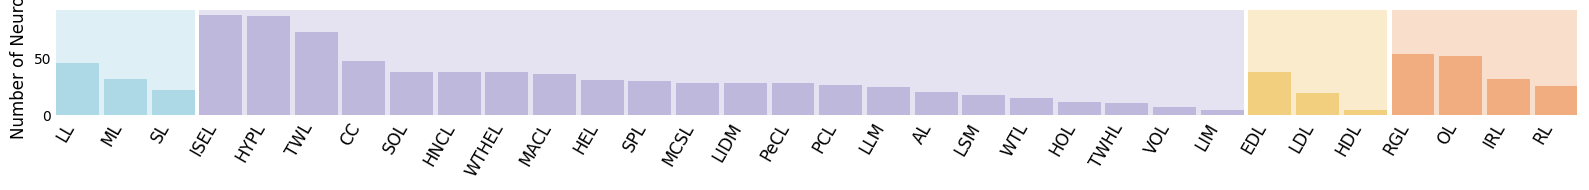

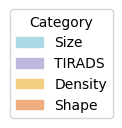

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
def draw_THYROID(number=1):
    df = pd.read_csv('/export/home/wuyueting/Interpretability/CLIP-dissect/results/thyroid_vit_24_10_09_15_08/descriptions.csv')
    categories,color_map = get_categories_and_colormap()
    
# Create a vertical bar plot with the x-axis being the description and the y-axis being the number of neurons
    df_filtered = df[(df['similarity'] > 1)& (df['layer'] == 'blocks['+str(number)+'].mlp.act')].copy()
    df_filtered['category_color'] = 'grey'

    # Assign colors to each row based on its category
    description_to_color = {}  # 描述到颜色的映射
    for category, items in categories.items():
        for item in items:
            description_to_color[item] = color_map[category]
    # 将颜色应用到过滤后的DataFrame
    df_filtered['category_color'] = df_filtered['description'].apply(lambda x: description_to_color.get(x, 'grey'))
    
    # print(df_filtered)
    # 确保所有描述都有有效的颜色
    assert not df_filtered['category_color'].isna().any(), "在'category_color'列中存在NaN值"

    # 统计每个描述的频率
    description_counts = df_filtered['description'].value_counts()
    description_counts = description_counts[description_counts > 0]
    
    # 更新 description_to_color 字典以包含计数信息
    for description in description_to_color.keys():
        # 获取描述的计数值，如果描述不存在于 description_counts 中，则返回0
        count = description_counts.get(description, 0)
        # 将颜色和计数作为元组存储
        description_to_color[description] = (description_to_color[description], count)

    # 打印更新后的字典
    data = {
    'description': [],
    'category_color': [],
    'counts': []
    }

    # 填充数据
    for description, (color, count) in description_to_color.items():
        data['description'].append(description)
        data['category_color'].append(color)
        data['counts'].append(count)

    color_order = {color: index for index, color in enumerate(color_map.values())}
    # 创建 DataFrame
    description_df = pd.DataFrame(data)
    color_order = {color: i for i, color in enumerate(color_map.values())}

    # 根据颜色顺序进行初步排序
#     description_df['color_order'] = description_df['category_color'].map(color_order)

# # # 对每个颜色组进行 counts 的降序排序
#     grouped_sorted = description_df.sort_values(by='category_color', key=lambda x: x.map(color_order))
#     grouped_sorted = grouped_sorted[grouped_sorted['counts']>0]
    
        # 将颜色顺序映射到数据框中
    description_df['color_order'] = description_df['category_color'].map(color_order)

    # 首先按照颜色顺序进行排序
    description_df = description_df.sort_values(by='color_order')

    # 然后对相同颜色内的数据按照 counts 进行降序排序
    description_df = description_df.sort_values(by=['color_order', 'counts'], ascending=[True, False])

    # 移除临时的 color_order 列
    description_df = description_df.drop(columns=['color_order'])
    grouped_sorted = description_df
    grouped_sorted = grouped_sorted[grouped_sorted['counts']>0]
    # grouped_sorted = grouped_sorted.sort_values(by=['counts','category_color'], ascending=[False, False])
    bar_width=1
    positions = range(len(grouped_sorted['counts']))
    
    unique_colors = grouped_sorted['category_color'].unique()
    color_blocks = {color: [] for color in unique_colors}
    # print(color_order)
    # Determine the start and end positions for each color block
    last_color = None
    for i, (color, count) in enumerate(zip(grouped_sorted['category_color'], grouped_sorted['counts'])):
        if color != last_color:
            if last_color is not None:
                color_blocks[last_color][-1].append(i)  # End position of the last block
            color_blocks[color].append([i])  # Start position of the new block
            last_color = color
    color_blocks[last_color][-1].append(i + 1)  # End position of the last block
    grouped_sorted.loc[:, 'abbr'] = grouped_sorted['description'].apply(lambda x: abbreviation_dict.get(x, None))
    
    # Adjusting the figure size dynamically based on the number of bars
    # plt.figure(figsize=(len(grouped_sorted['counts']), 2))

    # # Plotting the bars with fixed width and positions aligned to the left
    # plt.bar(positions, grouped_sorted['counts'], width=bar_width, color=grouped_sorted['category_color'], align='edge')

    # # Add shaded regions for each color block
    # for color, blocks in color_blocks.items():
    #     for start, end in blocks:
    #         plt.axvspan(start, end , color=color, alpha=0.4)  # Using a lighter shade with alpha

    # # Hide the frame of the plot and remove all text
    # for spine in plt.gca().spines.values():
    #     spine.set_visible(False)
    # plt.tick_params(labelbottom=False, bottom=False)
    # plt.tick_params(labelleft=False, left=False)
    # plt.xlim(0, len(grouped_sorted['counts']))
    # plt.ylim(0, 30)
    # plt.xlabel('')
    # plt.ylabel('')
    # plt.title('')

    # plt.tight_layout()  # Adjust layout
    # plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    # # Show the plot
    # plt.show()
    
    plt.figure(figsize=(len(grouped_sorted['counts'])//2, 2))
    plt.bar(grouped_sorted['abbr'], grouped_sorted['counts'], color=grouped_sorted['category_color'],width=0.9, align='center')

    # plt.bar(grouped_sorted['description'], grouped_sorted['counts'], color=grouped_sorted['category_color'],align='edge')

    # Add shaded regions for each color block
    for color, blocks in color_blocks.items():
        for start, end in blocks:
            plt.axvspan(start-0.45, end-0.55 , color=color, alpha=0.4,linewidth=0)
            
    # # 添加图例到图表
    # plt.legend(handles=legend_handles, title="Categories",framealpha=1.0, facecolor='white', loc='right')

    # plt.title('Number of Neuron per Description')
    # plt.xticks(rotation=60, ha='right')
    
    # 设置X轴标签字体大小和旋转角度
    plt.xticks(rotation=60, ha='right', fontsize=12)
    plt.ylabel('Number of Neuron', fontsize=12)  # 设置标题字体大小
    # plt.title('Block 12 summary (block closest to the output)',fontsize=12)
    # plt.subplots_adjust(left=-0.05)
    plt.tick_params(axis='y', which='both', pad=2)
    plt.tick_params(axis='x', which='both', length=0)  # 隐藏x轴的刻度线但保留标签
    plt.tick_params(axis='y', which='both', length=0)  # 隐藏y轴的刻度线    
    plt.xlim(-0.5, len(grouped_sorted['description']) - 0.5)
    # 去掉边框
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.tight_layout()
    # 显示图表
    plt.savefig(f'layer{number}.png', dpi=330, transparent=True, bbox_inches='tight')
    plt.show()
    
    
    
    legend_handles = []

    # 对于我们的颜色映射字典，为每个颜色创建一个图例项
    # 假设我们已经有了color_map变量
    for category, color in color_map.items():
        # 使用matplotlib.patches中的Patch对象创建图例项
        handle = mpatches.Patch(color=color, label=category)
        legend_handles.append(handle)

    # 创建一个空的图形
    fig, ax = plt.subplots()

    # 添加图例
    legend = ax.legend(handles=legend_handles, title="Category", loc='center')

    # 删除所有轴，但保留图例
    ax.axis('off')

    # 设置图形大小适合图例
    fig.canvas.draw()
    bbox = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.set_size_inches(bbox.width, bbox.height)

    # 保存图例为图片
    plt.savefig('legend.png', dpi=330,transparent=True,bbox_inches='tight')
    # 显示图例
    plt.show()
    

draw_THYROID(11)

activs_stats/thyroid_vit_small_5_nodule811model.blocks[-1].mlp.act/all_train.pkl exist!


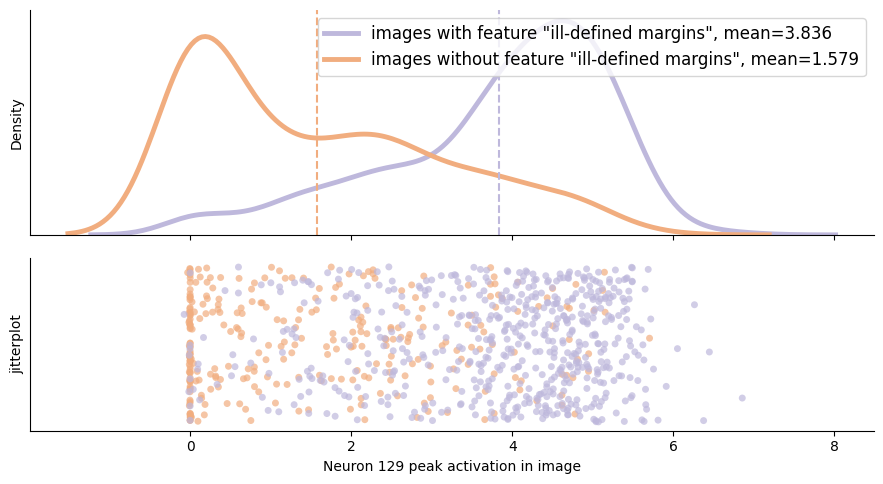

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import os
from utils import models, nethook, activ
import pandas as pd

# 定义生成路径的函数
def reshape_transform(tensor, height=14, width=14):
    # 去掉类别标记
    result = tensor[:, 1:, :].reshape(tensor.size(0),
    height, width, tensor.size(2))

    # 将通道维度放到第一个位置
    result = result.transpose(2, 3).transpose(1, 2)
    return result

def plot_jitter(neuron=129, feature_name = "Margin"):
    label = "all"
    folder_path = "/export/home/wuyueting/thyroid_data/BM/8_select5_nodule811_val_test/test/"
    model_name = "thyroid_vit_small_5_nodule811"
    target_layer="model.blocks[-1].mlp.act"
    target_save_name = model_name+target_layer
    
    
    if label == "all":
        image_files = sorted([os.path.abspath(os.path.join(folder_path+"0", file)) for file in os.listdir(folder_path+"0")] +[os.path.abspath(os.path.join(folder_path+"1", file)) for file in os.listdir(folder_path+"1")])
    else:
        image_files = sorted([os.path.abspath(os.path.join(folder_path+label, file)) for file in os.listdir(folder_path+label)])
    activ.get_same_class_stats(model_name,image_files, reshape_transform, target_layer=target_layer,save=f"activs_stats/{target_save_name}/{label}_train.pkl")
    
    f = open(f"activs_stats/{target_save_name}/{label}_train.pkl","rb")
    data = pickle.load(f) #[weights, max_activations, mean_activations]
    f.close()
    
    # ori_gradients = data[:, neuron, 0]
    ori_activations = data[:, neuron, 1]
    
    
    label_data = pd.read_csv("/export/home/wuyueting/thyroid_data/BM/filtered_thyroid_test.csv")
    
    def get_image_file_path(row):
        folder = str(row["BM"])  # 假设 BM 列是 0 或 1
        return os.path.join(folder_path, folder, row["Image Name"])
    if feature_name != "BM":       
        filtered_data = label_data.dropna(subset=[feature_name]).copy()
        filtered_data.loc[:, 'image_file'] = filtered_data.apply(get_image_file_path, axis=1)
        class_0_images= filtered_data[filtered_data[feature_name]==0]['image_file'].tolist()
        class_1_images= filtered_data[filtered_data[feature_name]==1]['image_file'].tolist()
    else:
        filtered_data = label_data.dropna(subset=["Image Name"]).copy()
        filtered_data.loc[:, 'image_file'] = filtered_data.apply(get_image_file_path, axis=1)
        # 筛选 BM 列为 0 的图像文件
        class_0_images = filtered_data[filtered_data['BM'] == 0]['image_file'].tolist()
        # 筛选 BM 列为 1 的图像文件
        class_1_images = filtered_data[filtered_data['BM'] == 1]['image_file'].tolist()

    
    class_0_indices = [idx for idx, img in enumerate(image_files) if img in class_0_images]
    class_1_indices = [idx for idx, img in enumerate(image_files) if img in class_1_images]



    activation_0 = ori_activations[class_0_indices].tolist()  
    activation_1 = ori_activations[class_1_indices].tolist()

    mean_activation_0 = np.mean(activation_0)
    mean_activation_1 = np.mean(activation_1)

    # # 显示图像
    # plt.show()
    # 创建一个DataFrame来组织数据
    data = pd.DataFrame({
        "Activation": activation_0 + activation_1,  # 将两个列表连接在一起
        "Margin": ['0'] * len(activation_0) + ['1'] * len(activation_1),  # 对应的分类标签
        "y": ['0'] * (len(activation_0) + len(activation_1))  # 用于抖动图的y轴
    })
      
    # 创建两个子图，使用共享的x轴
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9,5), sharex=True, gridspec_kw={'height_ratios': [1.3, 1]})
    plt.rcParams.update({'font.size': 12})
    # plt.figure(figsize=(10, 4))  # 调整高度为4，使图更矮
    # 上面的KDE密度估计曲线
    
    feature_description = "ill-defined margins"
    
    sns.kdeplot(activation_1, color='#BEB8DC', label=f"images with feature \"{feature_description}\", mean={mean_activation_1:.3f}", ax=ax1,linewidth=3.5)
    sns.kdeplot(activation_0, color='#F1AD7F', label=f"images without feature \"{feature_description}\", mean={mean_activation_0:.3f}", ax=ax1,linewidth=3.5)

    # 显示密度曲线的均值
    ax1.axvline(mean_activation_0, color='#F1AD7F', linestyle='--')
    ax1.axvline(mean_activation_1, color='#BEB8DC', linestyle='--')

    # 添加密度图的标签和标题
    ax1.legend()
    ax1.set_ylabel("Density")
    ax1.set_yticks([])  # 去掉y轴刻度
    # ax1.set_title(f"Neuron {neuron} Peak Activation Density with Feature {feature_name}")
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    # 下面的抖动图
    sns.stripplot(x="Activation", y="y", data=data, jitter=0.45, hue="Margin", palette=['#F1AD7F','#BEB8DC'], dodge=False, size=5, edgecolor='black',alpha=0.7, ax=ax2)

    ax2.legend().remove()
    # 添加抖动图的标签
    ax2.set_xlabel(f"Neuron {neuron} peak activation in image")
    ax2.set_ylabel("jitterplot")
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    
    # 去掉y轴的标签和刻度线
    ax2.set_yticks([])  # 去掉y轴刻度

    # 调整布局和显示图像
    plt.tight_layout()
    plt.show()
    fig.savefig("output_image.png", dpi=330, transparent=True)

plot_jitter()

activs_stats/thyroid_vit_small_5_nodule811model.blocks[-1].mlp.act/all_train.pkl exist!


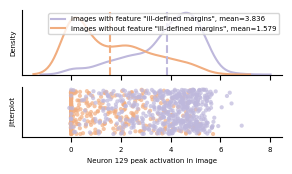

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import os
from PIL import Image
from utils import models, nethook, activ
import pandas as pd

# 定义生成路径的函数
def reshape_transform(tensor, height=14, width=14):
    # 去掉类别标记
    result = tensor[:, 1:, :].reshape(tensor.size(0),
    height, width, tensor.size(2))

    # 将通道维度放到第一个位置
    result = result.transpose(2, 3).transpose(1, 2)
    return result

def plot_jitter(neuron=129, feature_name="Margin"):
    label = "all"
    folder_path = "/export/home/wuyueting/thyroid_data/BM/8_select5_nodule811_val_test/test/"
    model_name = "thyroid_vit_small_5_nodule811"
    target_layer = "model.blocks[-1].mlp.act"
    target_save_name = model_name + target_layer
    
    if label == "all":
        image_files = sorted([os.path.abspath(os.path.join(folder_path+"0", file)) for file in os.listdir(folder_path+"0")] +
                             [os.path.abspath(os.path.join(folder_path+"1", file)) for file in os.listdir(folder_path+"1")])
    else:
        image_files = sorted([os.path.abspath(os.path.join(folder_path+label, file)) for file in os.listdir(folder_path+label)])
    
    activ.get_same_class_stats(model_name, image_files, reshape_transform, target_layer=target_layer, save=f"activs_stats/{target_save_name}/{label}_train.pkl")
    
    f = open(f"activs_stats/{target_save_name}/{label}_train.pkl", "rb")
    data = pickle.load(f)  # [weights, max_activations, mean_activations]
    f.close()
    
    # ori_gradients = data[:, neuron, 0]
    ori_activations = data[:, neuron, 1]
    
    label_data = pd.read_csv("/export/home/wuyueting/thyroid_data/BM/filtered_thyroid_test.csv")
    
    def get_image_file_path(row):
        folder = str(row["BM"])  # 假设 BM 列是 0 或 1
        return os.path.join(folder_path, folder, row["Image Name"])
    
    if feature_name != "BM":
        filtered_data = label_data.dropna(subset=[feature_name]).copy()
        filtered_data.loc[:, 'image_file'] = filtered_data.apply(get_image_file_path, axis=1)
        class_0_images = filtered_data[filtered_data[feature_name] == 0]['image_file'].tolist()
        class_1_images = filtered_data[filtered_data[feature_name] == 1]['image_file'].tolist()
    else:
        filtered_data = label_data.dropna(subset=["Image Name"]).copy()
        filtered_data.loc[:, 'image_file'] = filtered_data.apply(get_image_file_path, axis=1)
        class_0_images = filtered_data[filtered_data['BM'] == 0]['image_file'].tolist()
        class_1_images = filtered_data[filtered_data['BM'] == 1]['image_file'].tolist()

    class_0_indices = [idx for idx, img in enumerate(image_files) if img in class_0_images]
    class_1_indices = [idx for idx, img in enumerate(image_files) if img in class_1_images]

    activation_0 = ori_activations[class_0_indices].tolist()  
    activation_1 = ori_activations[class_1_indices].tolist()

    mean_activation_0 = np.mean(activation_0)
    mean_activation_1 = np.mean(activation_1)

    # 创建一个DataFrame来组织数据
    data = pd.DataFrame({
        "Activation": activation_0 + activation_1,  # 将两个列表连接在一起
        "Margin": ['0'] * len(activation_0) + ['1'] * len(activation_1),  # 对应的分类标签
        "y": ['0'] * (len(activation_0) + len(activation_1))  # 用于抖动图的y轴
    })
      
    # 设置字体大小
    plt.rcParams.update({'font.size': 5})

    # 转换毫米到英寸
    figsize = (73 / 25.4, 43 / 25.4)

    # 创建两个子图，使用共享的x轴
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize, sharex=True, gridspec_kw={'height_ratios': [1.3, 1]})
    
    feature_description = "ill-defined margins"
    
    sns.kdeplot(activation_1, color='#BEB8DC', label=f"images with feature \"{feature_description}\", mean={mean_activation_1:.3f}", ax=ax1, linewidth=1.5)
    sns.kdeplot(activation_0, color='#F1AD7F', label=f"images without feature \"{feature_description}\", mean={mean_activation_0:.3f}", ax=ax1, linewidth=1.5)

    # 显示密度曲线的均值
    ax1.axvline(mean_activation_0, color='#F1AD7F', linestyle='--')
    ax1.axvline(mean_activation_1, color='#BEB8DC', linestyle='--')

    # 添加密度图的标签和标题
    ax1.legend()
    ax1.set_ylabel("Density")
    ax1.set_yticks([])  # 去掉y轴刻度
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)

    # 下面的抖动图
    sns.stripplot(x="Activation", y="y", data=data, jitter=0.45, hue="Margin", palette=['#F1AD7F', '#BEB8DC'], dodge=False, size=3, edgecolor='black', alpha=0.7, ax=ax2)

    ax2.legend().remove()
    # 添加抖动图的标签
    ax2.set_xlabel(f"Neuron {neuron} peak activation in image")
    ax2.set_ylabel("jitterplot")
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    
    # 去掉y轴的标签和刻度线
    ax2.set_yticks([])  # 去掉y轴刻度

    # 调整布局和显示图像
    plt.tight_layout()
    plt.show()
    fig.savefig("output_image.png", dpi=330, transparent=True)

plot_jitter()


activs_stats/thyroid_vit_small_5_nodule811model.blocks[-1].mlp.act/all_train.pkl exist!
Randomly selected activation: 1.816810965538025, Class: 0, Image file: /export/home/wuyueting/thyroid_data/BM/8_select5_nodule811_val_test/test/1/b16161031102027.jpg


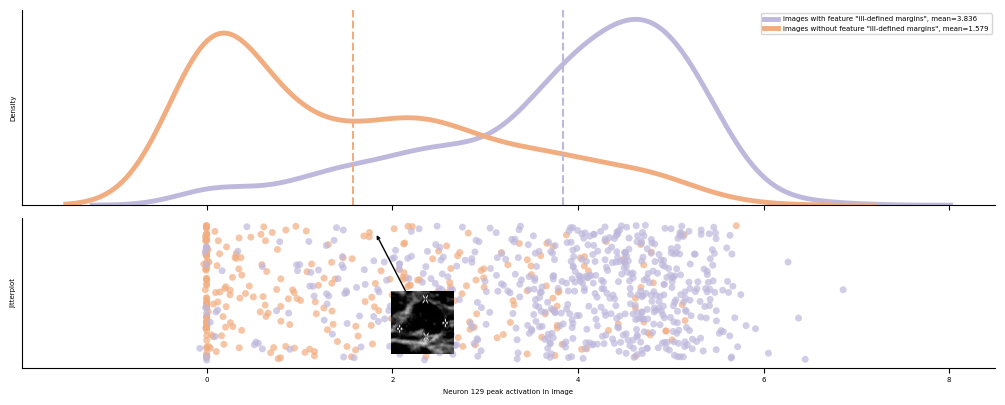

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import os
import random
import pandas as pd
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image

random.seed(4)

# 定义生成路径的函数
def reshape_transform(tensor, height=14, width=14):
    result = tensor[:, 1:, :].reshape(tensor.size(0), height, width, tensor.size(2))
    result = result.transpose(2, 3).transpose(1, 2)
    return result

def plot_jitter(neuron=129, feature_name="Margin"):
    label = "all"
    folder_path = "/export/home/wuyueting/thyroid_data/BM/8_select5_nodule811_val_test/test/"
    model_name = "thyroid_vit_small_5_nodule811"
    target_layer = "model.blocks[-1].mlp.act"
    target_save_name = model_name + target_layer

    if label == "all":
        image_files = sorted(
            [os.path.abspath(os.path.join(folder_path + "0", file)) for file in os.listdir(folder_path + "0")] +
            [os.path.abspath(os.path.join(folder_path + "1", file)) for file in os.listdir(folder_path + "1")]
        )
    else:
        image_files = sorted([os.path.abspath(os.path.join(folder_path + label, file)) for file in os.listdir(folder_path + label)])

    activ.get_same_class_stats(model_name, image_files, reshape_transform, target_layer=target_layer, save=f"activs_stats/{target_save_name}/{label}_train.pkl")

    f = open(f"activs_stats/{target_save_name}/{label}_train.pkl", "rb")
    data = pickle.load(f)
    f.close()

    ori_activations = data[:, neuron, 1]

    label_data = pd.read_csv("/export/home/wuyueting/thyroid_data/BM/filtered_thyroid_test.csv")

    def get_image_file_path(row):
        folder = str(row["BM"])  # 假设 BM 列是 0 或 1
        return os.path.join(folder_path, folder, row["Image Name"])

    if feature_name != "BM":
        filtered_data = label_data.dropna(subset=[feature_name]).copy()
        filtered_data.loc[:, 'image_file'] = filtered_data.apply(get_image_file_path, axis=1)
        class_0_images = filtered_data[filtered_data[feature_name] == 0]['image_file'].tolist()
        class_1_images = filtered_data[filtered_data[feature_name] == 1]['image_file'].tolist()
    else:
        filtered_data = label_data.dropna(subset=["Image Name"]).copy()
        filtered_data.loc[:, 'image_file'] = filtered_data.apply(get_image_file_path, axis=1)
        class_0_images = filtered_data[filtered_data['BM'] == 0]['image_file'].tolist()
        class_1_images = filtered_data[filtered_data['BM'] == 1]['image_file'].tolist()

    class_0_indices = [idx for idx, img in enumerate(image_files) if img in class_0_images]
    class_1_indices = [idx for idx, img in enumerate(image_files) if img in class_1_images]

    activation_0 = ori_activations[class_0_indices].tolist()
    activation_1 = ori_activations[class_1_indices].tolist()

    mean_activation_0 = np.mean(activation_0)
    mean_activation_1 = np.mean(activation_1)

    # 创建一个DataFrame来组织数据
    data = pd.DataFrame({
        "Activation": activation_0 + activation_1,  # 将两个列表连接在一起
        "Margin": ['0'] * len(activation_0) + ['1'] * len(activation_1),  # 对应的分类标签
        "y": ['0'] * (len(activation_0) + len(activation_1))  # 用于抖动图的y轴
    })

    # 创建两个子图，使用共享的x轴
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 4), sharex=True, gridspec_kw={'height_ratios': [1.3, 1]})
    plt.rcParams.update({'font.size': 5})
    # 上面的KDE密度估计曲线
    feature_description = "ill-defined margins"
    sns.kdeplot(activation_1, color='#BEB8DC', label=f"images with feature \"{feature_description}\", mean={mean_activation_1:.3f}", ax=ax1, linewidth=3.5)
    sns.kdeplot(activation_0, color='#F1AD7F', label=f"images without feature \"{feature_description}\", mean={mean_activation_0:.3f}", ax=ax1, linewidth=3.5)

    ax1.axvline(mean_activation_0, color='#F1AD7F', linestyle='--')
    ax1.axvline(mean_activation_1, color='#BEB8DC', linestyle='--')

    ax1.legend()
    ax1.set_ylabel("Density")
    ax1.set_yticks([])  
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)

    # 下面的抖动图
    scatter = sns.stripplot(x="Activation", y="y", data=data, jitter=0.45, hue="Margin", palette=['#F1AD7F', '#BEB8DC'], dodge=False, size=5, edgecolor='black', alpha=0.7, ax=ax2)

    ax2.legend().remove()
    ax2.set_xlabel(f"Neuron {neuron} peak activation in image")
    ax2.set_ylabel("jitterplot")
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.set_yticks([])

    # 随机选择一个点
    class_0 = True
    if class_0:
        random_activation = random.choice(activation_0)
        random_class = '0'
        image_file = random.choice(class_0_images)
    else:
        random_activation = random.choice(activation_1)
        random_class = '1'
        image_file = random.choice(class_1_images)

    print(f"Randomly selected activation: {random_activation}, Class: {random_class}, Image file: {image_file}")

    # 标注该点并加箭头
    ax2.annotate(f'', xy=(random_activation, -0.4), xytext=(random_activation + 0.5, 0.2),
                 arrowprops=dict(facecolor='black', arrowstyle='->'))

    # 在图旁边显示图片
    img = Image.open(image_file)
    square_size = 150  # 设定正方形图片的边长为150像素
    img = img.resize((square_size,square_size),Image.ANTIALIAS)

    # 使用 OffsetImage 将图片加载到 matplotlib 中
    imagebox = OffsetImage(img, zoom=0.3)  # 调整 zoom 以控制图片大小

    # 添加到图表中的特定位置
    # 修改 (x, y) 的位置参数来调整图片显示的位置
    ab = AnnotationBbox(imagebox, (random_activation + 0.5, 0.2), frameon=False)  # 调整 (x, y) 来移动图片
    ax2.add_artist(ab)

    plt.tight_layout()
    plt.show()
    # fig.savefig("output_image.png", dpi=330, transparent=True)

plot_jitter()


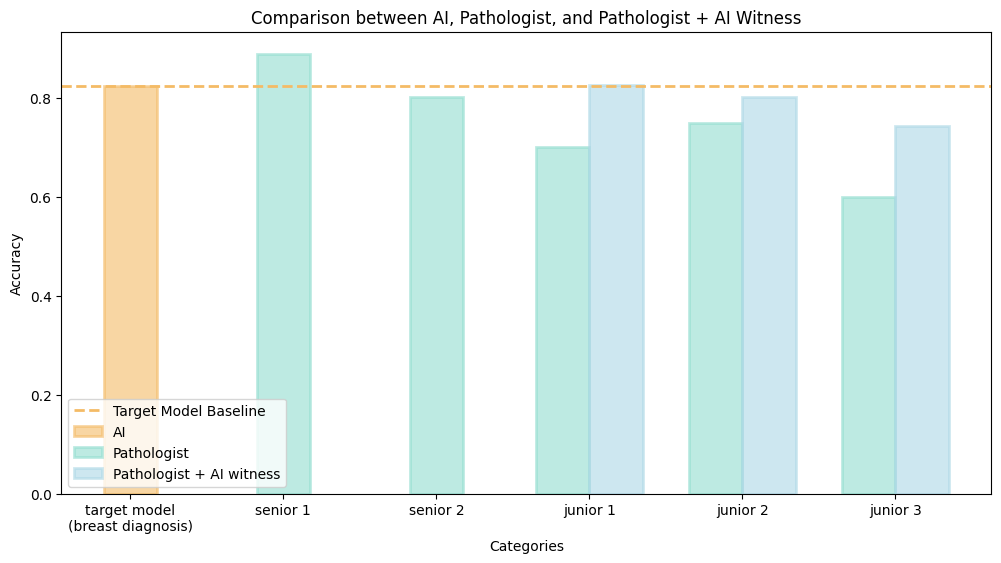

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
labels = ['target model\n(breast diagnosis)', 'senior 1', 'senior 2', 'junior 1', 'junior 2', 'junior 3']
values = [0.825, 0.890, 0.803, 0.7, 0.75, 0.6]  # Pathologist 的值
values_with_ai = [None, None, None, 0.826, 0.803, 0.743]  # 带有 AI 辅助的值
target_value = values[0]
x = np.arange(len(labels))  # X 轴位置
width = 0.35  # 每组柱子的宽度

fig, ax = plt.subplots(figsize=(12, 6))  # 将图像宽度加大

# 设置不同的颜色
color_ai = '#F4BB66'
color_pathologist = '#91DDCF'
color_pathologist_ai = '#ADD8E6'

# 设置透明度
alpha = 0.6

# 在 target model 的值位置添加一条水平线
ax.axhline(y=target_value, color=color_ai, linestyle='--', linewidth=2, label='Target Model Baseline')

# 绘制 AI, Pathologist 和 Pathologist + AI witness 的柱子（使用描边和透明填充）
ax.bar(x[0], values[0], width, edgecolor=color_ai, facecolor=color_ai, alpha=alpha,linewidth=2, label='AI')
ax.bar(x[1], values[1], width, edgecolor=color_pathologist, facecolor=color_pathologist,linewidth=2, alpha=alpha)
ax.bar(x[2], values[2], width, edgecolor=color_pathologist, facecolor=color_pathologist,linewidth=2, alpha=alpha)

# 第四到第六列，分别绘制 pathologist 和 pathologist + AI witness
for i in range(3, 6):
    ax.bar(x[i] - width/2, values[i], width, edgecolor=color_pathologist,linewidth=2, facecolor=color_pathologist, alpha=alpha, label='Pathologist' if i == 3 else "")
    ax.bar(x[i] + width/2, values_with_ai[i], width, edgecolor=color_pathologist_ai,linewidth=2, facecolor=color_pathologist_ai, alpha=alpha, label='Pathologist + AI witness' if i == 3 else "")

# 设定标签和标题
ax.set_xlabel('Categories')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison between AI, Pathologist, and Pathologist + AI Witness')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()
